# Imports

In [31]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#save links
basics_url = 'https://datasets.imdbws.com/title.basics.tsv.gz'
ratings_url = 'https://datasets.imdbws.com/title.ratings.tsv.gz'
akas_url = 'https://datasets.imdbws.com/title.akas.tsv.gz'

# Preprocessing Basics

In [3]:
#creating Basics DF
basics_df = pd.read_csv(basics_url, sep='\t', low_memory=False)



In [4]:
#inspecting basics df
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9399297 entries, 0 to 9399296
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 645.4+ MB


In [5]:
#replacing missing values with nan
basics_df = basics_df.replace({'\\N':np.nan})
basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short"


In [6]:
basics_df.isna().sum()

tconst                  0
titleType               0
primaryTitle           11
originalTitle          11
isAdult                 1
startYear         1261909
endYear           9300239
runtimeMinutes    6770303
genres             431060
dtype: int64

In [7]:
#drop nan Running Time and Genre 
basics_df = basics_df.dropna(subset=['runtimeMinutes', 'genres'])
basics_df.head()


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short"


In [8]:
#confirming dropped values
basics_df.isna().sum()

tconst                  0
titleType               0
primaryTitle            1
originalTitle           1
isAdult                 0
startYear           97593
endYear           2513454
runtimeMinutes          0
genres                  0
dtype: int64

In [9]:
#checking titleType values for movie filter
basics_df['titleType'].value_counts()

tvEpisode       1206231
short            583951
movie            372416
video            177033
tvMovie           89146
tvSeries          87958
tvSpecial         17068
tvMiniSeries      16476
tvShort            9475
videoGame           312
Name: titleType, dtype: int64

In [10]:
#only movie types for df
basics_df= basics_df.loc[basics_df['titleType'] == 'movie']
basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,NaN,45,Romance
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,NaN,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,NaN,90,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,NaN,120,"Adventure,Fantasy"
930,tt0000941,movie,Locura de amor,Locura de amor,0,1909,NaN,45,Drama


In [11]:
#excluding documentaries
basics_df['genres'].value_counts()

is_documentary = basics_df['genres'].str.contains('Documentary',case=False)
basics_df = basics_df[~is_documentary]



In [12]:
#only movies after 2000
basics_df['startYear'] = basics_df['startYear'].astype(float)
basics_df.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult            object
startYear         float64
endYear            object
runtimeMinutes     object
genres             object
dtype: object

In [13]:
#inspecting akas
basics_df=basics_df.loc[(basics_df['startYear']>=2000)&(basics_df['startYear']<2022)]
basics_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34793,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
61095,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020.0,NaN,70,Drama
67643,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
77937,tt0079644,movie,November 1828,November 1828,0,2001.0,NaN,140,"Drama,War"
86773,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
...,...,...,...,...,...,...,...,...,...
9398969,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,NaN,51,Drama
9398978,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller"
9399017,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020.0,NaN,84,Thriller
9399062,tt9916362,movie,Coven,Akelarre,0,2020.0,NaN,92,"Drama,History"


# Preprocessing AKAS

In [14]:
#loading akas
akas_df = pd.read_csv(akas_url, sep='\t', low_memory=False)

In [15]:
#replacing nan values
akas_df = akas_df.replace({'\\N':np.nan})
akas_df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,NaN,imdbDisplay,NaN,0
1,tt0000001,2,Carmencita,DE,NaN,NaN,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,NaN,imdbDisplay,NaN,0
3,tt0000001,4,Καρμενσίτα,GR,NaN,imdbDisplay,NaN,0
4,tt0000001,5,Карменсита,RU,NaN,imdbDisplay,NaN,0


# Preprocessing Ratings


In [16]:
#creating Ratings DF
ratings_df = pd.read_csv(ratings_url, sep='\t', low_memory=False)

In [17]:
ratings_df = ratings_df.replace({'\\N':np.nan})
ratings_df.head()



,tconst,averageRating,numVotes
0,tt0000001,5.7,1924
1,tt0000002,5.8,259
2,tt0000003,6.5,1737
3,tt0000004,5.6,174
4,tt0000005,6.2,2550


In [18]:
#filtering only us movies
us = basics_df['tconst'].isin(akas_df['titleId'])
us

34793      True
61095      True
67643      True
77937      True
86773      True
           ... 
9398969    True
9398978    True
9399017    True
9399062    True
9399146    True
Name: tconst, Length: 137188, dtype: bool

In [19]:
#saving df with only us movies
basics_df = basics_df[us]
basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34793,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
61095,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020.0,NaN,70,Drama
67643,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
77937,tt0079644,movie,November 1828,November 1828,0,2001.0,NaN,140,"Drama,War"
86773,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"


# Saving Data


In [20]:
# Saving DF to Data Folder
basics_df.to_csv("DATA/title_basics.csv.gz",compression='gzip',index=False)
akas_df.to_csv("DATA/title_akas.csv.gz",compression='gzip',index=False)
ratings_df.to_csv("DATA/title_ratings.csv.gz", compression='gzip', index=False)



In [21]:
#replacing basics variable path
basics_df = pd.read_csv("DATA/title_basics.csv.gz", low_memory = False)
basics_df.head()



,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020.0,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,tt0079644,movie,November 1828,November 1828,0,2001.0,NaN,140,"Drama,War"
4,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"


In [22]:
#replacing akas variable path
akas_df = pd.read_csv("DATA/title_akas.csv.gz", low_memory=False)
akas_df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,NaN,imdbDisplay,NaN,0.0
1,tt0000001,2,Carmencita,DE,NaN,NaN,literal title,0.0
2,tt0000001,3,Carmencita - spanyol tánc,HU,NaN,imdbDisplay,NaN,0.0
3,tt0000001,4,Καρμενσίτα,GR,NaN,imdbDisplay,NaN,0.0
4,tt0000001,5,Карменсита,RU,NaN,imdbDisplay,NaN,0.0


In [23]:
#replacing ratings variable path
ratings_df = pd.read_csv("DATA/title_ratings.csv.gz", low_memory=False)
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1924
1,tt0000002,5.8,259
2,tt0000003,6.5,1737
3,tt0000004,5.6,174
4,tt0000005,6.2,2550


#  Importing TMDB API

In [2]:
#importing json librarie
import json
with open(r"\Users\camer\.secret\timdb_api.json", "r") as f:
    login = json.load(f)
    
login.keys()

dict_keys(['api-key'])

In [3]:
#importing TMDB api
import tmdbsimple as tmdb
tmdb.API_KEY = login['api-key']

In [4]:
#test search to ensure success
tmdb.Movies(599).info()

{'adult': False,
 'backdrop_path': '/p47ihFj4A7EpBjmPHdTj4ipyq1S.jpg',
 'belongs_to_collection': None,
 'budget': 1752000,
 'genres': [{'id': 18, 'name': 'Drama'}],
 'homepage': '',
 'id': 599,
 'imdb_id': 'tt0043014',
 'original_language': 'en',
 'original_title': 'Sunset Boulevard',
 'overview': 'A hack screenwriter writes a screenplay for a former silent film star who has faded into Hollywood obscurity.',
 'popularity': 21.023,
 'poster_path': '/sC4Dpmn87oz9AuxZ15Lmip0Ftgr.jpg',
 'production_companies': [{'id': 4,
   'logo_path': '/gz66EfNoYPqHTYI4q9UEN4CbHRc.png',
   'name': 'Paramount',
   'origin_country': 'US'}],
 'production_countries': [{'iso_3166_1': 'US',
   'name': 'United States of America'}],
 'release_date': '1950-08-10',
 'revenue': 5000000,
 'runtime': 110,
 'spoken_languages': [{'english_name': 'English',
   'iso_639_1': 'en',
   'name': 'English'}],
 'status': 'Released',
 'tagline': 'A Hollywood Story.',
 'title': 'Sunset Boulevard',
 'video': False,
 'vote_average'

# Creating and Defining Our Two Functions

In [5]:
#creating function for movie rating
def get_movie_with_rating(movie_id):
    movie = tmdb.Movies(movie_id)
    info = movie.info()
    releases = movie.releases()
    for c in releases['countries']:
        if c['iso_3166_1']=='US':
            info['certification'] = c['certification']
    return info

In [6]:
#first test
test1 = get_movie_with_rating('tt0848228')
test1

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 165.946,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

In [7]:
#second test 
test2 = get_movie_with_rating('tt0332280')
test2

{'adult': False,
 'backdrop_path': '/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg',
 'belongs_to_collection': None,
 'budget': 29000000,
 'genres': [{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}],
 'homepage': 'http://www.newline.com/properties/notebookthe.html',
 'id': 11036,
 'imdb_id': 'tt0332280',
 'original_language': 'en',
 'original_title': 'The Notebook',
 'overview': "An epic love story centered around an older man who reads aloud to a woman with Alzheimer's. From a faded notebook, the old man's words bring to life the story about a couple who is separated by World War II, and is then passionately reunited, seven years later, after they have taken different paths.",
 'popularity': 67.515,
 'poster_path': '/rNzQyW4f8B8cQeg7Dgj3n6eT5k9.jpg',
 'production_companies': [{'id': 12,
   'logo_path': '/iaYpEp3LQmb8AfAtmTvpqd4149c.png',
   'name': 'New Line Cinema',
   'origin_country': 'US'},
  {'id': 1565, 'logo_path': None, 'name': 'Avery Pix', 'origin_country': 'US'},
  {'id': 26

In [8]:
#prepping second function
import os, time
import tmdbsimple as tmdb 
from tqdm.notebook import tqdm_notebook
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'title_akas.csv.gz',
 'title_basics.csv.gz',
 'title_ratings.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json']

In [9]:
#create function to make json files
def write_json(new_data, filename): 
  
    with open(filename,'r+') as file:
       
        file_data = json.load(file)
      
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
             file.seek(0)
       
             json.dump(file_data, file)

In [10]:
#adding info for years 2000 and 2001
basics = pd.read_csv('Data/title_basics.csv.gz')
YEARS_TO_GET = [2000,2001]
errors = []
 

In [11]:
#start ouloop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    file_exists = os.path.isfile(JSON_FILE)
    if file_exists == False:
        with open(JSON_FILE, 'w') as f:
            json.dump([{'imdb_id':0}], f)
    df = basics.loc[basics['startYear']==YEAR].copy()
    movie_ids = df['tconst'].copy()
    previous_df = pd.read_json(JSON_FILE)
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]
    #inner loop
    for movie_id in tqdm_notebook(movie_ids_to_get,
                                  desc = f'Movies from {YEAR}',
                                  position = 1,
                                  leave = True):
        try: 
            temp = get_movie_with_rating(movie_id)
            write_json(temp, JSON_FILE)
            time.sleep(0.02)
        except Exception as e:
            errors.append([movie_id, e])
    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

print(f'total error {len(errors)}')
    
                                
                                                                 
                                                             

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Movies from 2000:   0%|          | 0/2722 [00:00<?, ?it/s]

Movies from 2001:   0%|          | 0/2847 [00:00<?, ?it/s]

total error 1117


# Exploratory Data Analysis

In [12]:
#inspecting first df
df= pd.read_csv('DATA/final_tmdb_data_2000.csv.gz')
df.head()


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN
4,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,5.5,2.0,NaN


In [14]:
#inspecting second df
df2= pd.read_csv('DATA/final_tmdb_data_2001.csv.gz')
df2.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.3,1158.0,PG-13
2,tt0079644,0.0,/79axmuH1UGkB7m72jjB9rPff9om.jpg,NaN,0.0,"[{'id': 10752, 'name': 'War'}]",NaN,285529.0,id,November 1828,...,0.0,140.0,"[{'english_name': 'Indonesian', 'iso_639_1': '...",Released,NaN,November 1828,0.0,0.0,0.0,NaN
3,tt0089067,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,210258.0,es,El día de los albañiles 2,...,0.0,90.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,The laborers are back full of love and laughs.,El día de los albañiles 2,0.0,7.2,71.0,NaN
4,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.0,3.0,NaN


In [15]:
#combining dataframes
final_df = pd.concat((df, df2), ignore_index=True)
display(final_df.head(),final_df.tail())

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.3,1158.0,PG-13
2,tt0079644,0.0,/79axmuH1UGkB7m72jjB9rPff9om.jpg,NaN,0.0,"[{'id': 10752, 'name': 'War'}]",NaN,285529.0,id,November 1828,...,0.0,140.0,"[{'english_name': 'Indonesian', 'iso_639_1': '...",Released,NaN,November 1828,0.0,0.0,0.0,NaN
3,tt0089067,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,210258.0,es,El día de los albañiles 2,...,0.0,90.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,The laborers are back full of love and laughs.,El día de los albañiles 2,0.0,7.2,71.0,NaN
4,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.0,3.0,NaN


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
4505,tt8929248,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 18, '...",NaN,78417.0,ta,அழகான நாட்கள்,...,0.0,150.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Azhagana Naatkal,0.0,0.0,0.0,NaN
4506,tt8942962,0.0,/gTXCI8ixWjRyll0IwYX4Fk8Mcqe.jpg,NaN,0.0,[],NaN,273575.0,ta,Dosth,...,0.0,0.0,[],Released,NaN,Dost,0.0,3.0,1.0,NaN
4507,tt9071078,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}]",http://www.hkcinemagic.com/en/movie.asp?id=6627,201706.0,cn,致命密函,...,0.0,90.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,Chinese Heroes,0.0,3.0,2.0,NaN
4508,tt9099724,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,616033.0,ja,Rokushukan Private Moment,...,0.0,102.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,Rokushukan Private Moment,0.0,0.0,0.0,NaN
4509,tt9798698,0.0,NaN,NaN,0.0,[],NaN,580269.0,en,Gay holocaust,...,0.0,0.0,[],Released,NaN,Gay holocaust,0.0,0.0,0.0,NaN


In [16]:
#inspecting new datafram
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                4510 non-null   object 
 1   adult                  4508 non-null   float64
 2   backdrop_path          1956 non-null   object 
 3   belongs_to_collection  238 non-null    object 
 4   budget                 4508 non-null   float64
 5   genres                 4508 non-null   object 
 6   homepage               282 non-null    object 
 7   id                     4508 non-null   float64
 8   original_language      4508 non-null   object 
 9   original_title         4508 non-null   object 
 10  overview               4172 non-null   object 
 11  popularity             4508 non-null   float64
 12  poster_path            3836 non-null   object 
 13  production_companies   4508 non-null   object 
 14  production_countries   4508 non-null   object 
 15  rele

In [17]:
#saving copy of new df
final_df.to_csv('Data/final_results_movie_00-01.csv.gz', compression='gzip',index=False)

In [23]:
#only including movies with financial info more than 0
final_df = final_df.loc[final_df['budget']>0]
final_df = final_df.loc[final_df['revenue']>0] 
final_df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.300,1158.0,PG-13
7,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.600,118.0,PG-13
12,tt0120681,0.0,/xo2S7gRwCvWdVqM0Swv37yA2rzw.jpg,NaN,35000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,768.0,en,From Hell,...,74558115.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only the legend will survive.,From Hell,0.0,6.694,2405.0,R
13,tt0120737,0.0,/tqj7NKj11keFuLzPsBDMUq2dOUO.jpg,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120.0,en,The Lord of the Rings: The Fellowship of the Ring,...,871368364.0,179.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,0.0,8.389,21836.0,PG-13
15,tt0120824,0.0,/gnyGSoVKOIz1BR34lIBuuTq0Znl.jpg,NaN,38000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,6440.0,en,The Shipping News,...,24690441.0,111.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You'll never guess what you'll find inside...,The Shipping News,0.0,6.351,316.0,R


In [24]:
#inspecting new data
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1 to 4458
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                390 non-null    object 
 1   adult                  390 non-null    float64
 2   backdrop_path          370 non-null    object 
 3   belongs_to_collection  84 non-null     object 
 4   budget                 390 non-null    float64
 5   genres                 390 non-null    object 
 6   homepage               74 non-null     object 
 7   id                     390 non-null    float64
 8   original_language      390 non-null    object 
 9   original_title         390 non-null    object 
 10  overview               388 non-null    object 
 11  popularity             390 non-null    float64
 12  poster_path            390 non-null    object 
 13  production_companies   390 non-null    object 
 14  production_countries   390 non-null    object 
 15  relea

How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

     - Well it seems after filtering all the values of '0' for Revenue and Budget we are left with 390 movies

How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [27]:
#inspecting value counts for certification
final_df['certification'].value_counts()

R        158
PG-13    124
PG        28
G         10
NR         4
Name: certification, dtype: int64

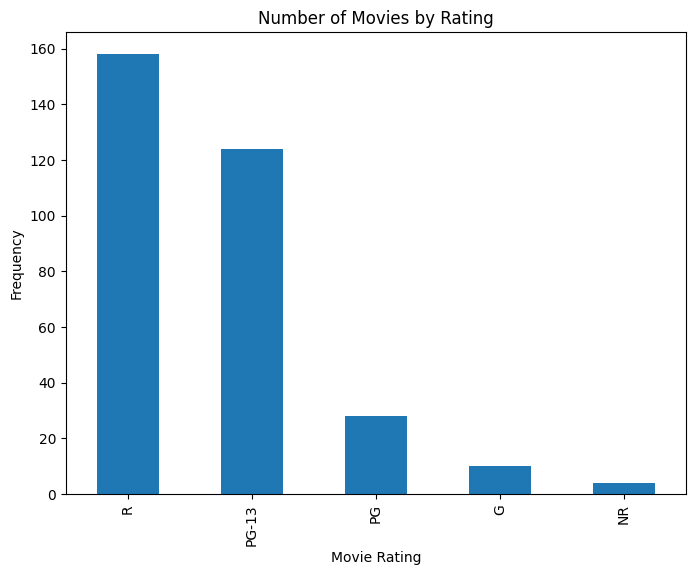

In [36]:
#creating bar graph to display count of each certification
#inspire from https://stackoverflow.com/questions/48939795/how-to-plot-a-count-bar-chart-with-a-pandas-df-grouping-by-one-categorical-colu
ax = final_df['certification'].value_counts().plot(kind='bar',
                                    figsize=(8,6),
                                    title="Number of Movies by Rating")
ax.set_xlabel("Movie Rating")
ax.set_ylabel("Frequency")
plt.show()

As seen above, most movies seems to be R and PG-13 while PG G and 'Not Rated' Movies are in the minority

What is the average revenue per certification category?

In [39]:
#creating variable using groupby
certrev = final_df.groupby('certification')['revenue'].mean()
certrev

certification
G        1.778149e+08
NR       2.680835e+07
PG       1.803318e+08
PG-13    1.092453e+08
R        5.243781e+07
Name: revenue, dtype: float64

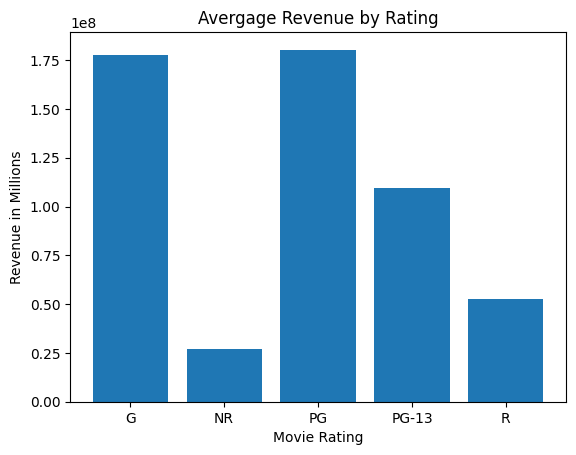

In [46]:
#creating graph for said variable
plt.bar(certrev.index, certrev.values)
plt.title('Avergage Revenue by Rating')
plt.xlabel('Movie Rating')
plt.ylabel('Revenue in Millions')
plt.show()

While they make more R and PG-13 movies, G and PG make the most money possibly due to the higher audience pool

What is the average budget per certification category?

In [48]:
#creating variable using groupby
certbudg = final_df.groupby('certification')['budget'].mean()
certbudg

certification
G        4.240000e+07
NR       7.200000e+06
PG       5.323929e+07
PG-13    4.551447e+07
R        2.924030e+07
Name: budget, dtype: float64

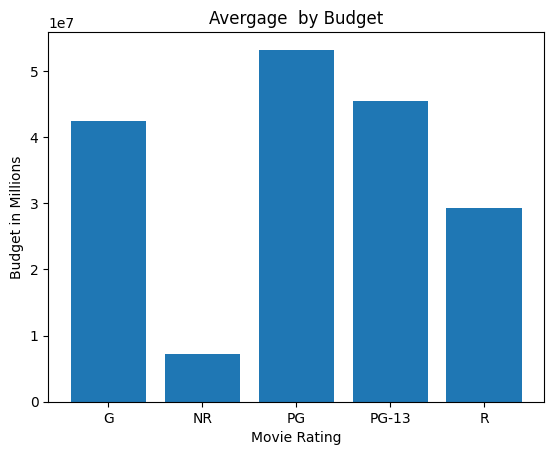

In [49]:
#creatinf final graph
plt.bar(certbudg.index, certbudg.values)
plt.title('Avergage  by Budget')
plt.xlabel('Movie Rating')
plt.ylabel('Budget in Millions')
plt.show()

It seems the movie rating that gets made the least, has the most budget. But, more money goes to PG-13 Movies than G.